# Perceptron

This is a simple Neural Network (Perceptron), built from scratch using no API or library.

Trying to classify two different flowers (red and blue) using the information about their length and width. 

In [71]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# length, width, label

data = [
    [3,1.5,1],
    [2,1,0],
    [4,1.5,1],
    [3,1,0],
    [3.5,0.5,1],
    [2,0.5,0],
    [5.5,1,1], 
    [1,1,0]
]

mystery_flower=[4.5,1]


# 0 -> blue, 1 -> red

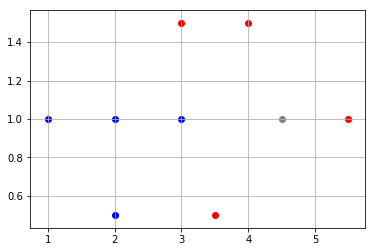

In [73]:
def vis_data():
    plt.grid()

    for points in range(len(data)):         
        if data[points][2]==1:
            color='red'
        elif data[points][2]==0:
            color='blue'
        plt.scatter(data[points][0], data[points][1], c=color)
    plt.scatter(mystery_flower[0], mystery_flower[1], c='gray')
    
vis_data()

In [74]:
#Creating Neural Network

def NeuralNetwork(m1,m2):
    z = w1*m1+w2*m2+b
    pred = sigmoid(z)
    return pred, z



# network

#       o  output: flower type
#      / \  w1, w2, b
#     o   o  input: length, width

In [75]:
#Random Initialization

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

print(w1,w2,b)

0.9762251380558096 1.4856844757862435 -0.14390650771531271


In [76]:
# Activation Function

def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

In [77]:
# Derivative for Backpropagation 

def d_sigmoid(x):
    y = sigmoid(x) * (1-sigmoid(x))
    return y

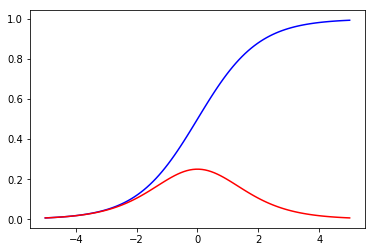

In [78]:
X = np.linspace(-5, 5, 100)

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
fig = plt.plot(X, d_sigmoid(X), c="r") # d_sigmoid in red

In [79]:
# Loss function: Squared error loss

def loss_func(pred,target):
    loss = (pred - target)**2
    return loss

In [80]:
#Differentiation for Backprop

def differentiation(pred, target,z, i):
    dloss_loss=1
    dloss_pred = 2*(pred - target)
    dpred_z = d_sigmoid(z)
    dz_w1 = data[i][0]
    dz_w2 = data[i][1]
    dz_b = 1

    dloss_w1 = dloss_pred * dpred_z * dz_w1
    dloss_w2 = dloss_pred * dpred_z * dz_w2
    dloss_b = dloss_pred * dpred_z * dz_b
    return dloss_w1, dloss_w2, dloss_b


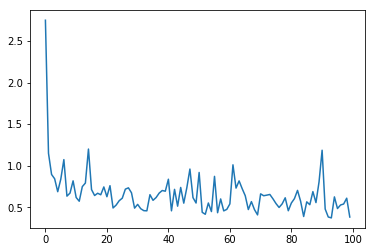

In [81]:
## Training

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

learning_rate = 0.5

cost=[]

for iteration in range(10000):
    i = np.random.randint(len(data))
    
    pred, z = NeuralNetwork(data[i][0], data[i][1])
    loss = loss_func(pred, data[i][2])

    if iteration%100==0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred,z = NeuralNetwork(p[0],p[1])
                c += loss_func(p_pred, p[2])
            cost.append(c)
    
    target = data[i][2]
    dloss_w1, dloss_w2, dloss_b = differentiation(pred, target, z, i)
    
    w1 = w1 - learning_rate * dloss_w1
    w2 = w2 - learning_rate*dloss_w2
    b = b - learning_rate*dloss_b

plt.plot(cost)

In [70]:
prediction = NeuralNetwork(mystery_flower[0],mystery_flower[1])[0]
if prediction> 0.5:
    print(prediction, 'red')
else:
    print(prediction, 'blue')

0.9996526205416494 red


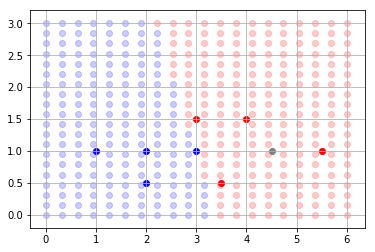

In [65]:

# check out the networks predictions in the x,y plane  
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue# and the other half red
vis_data()